* Branden Frieden
* CS6017
* 7/18/23
* character classification

# Part 1

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [2]:
df = pd.read_csv("fonts/BLACKADDER.csv")
display(df)

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,BLACKADDER,BLACKADDER ITC,61442,0.4,0,0.0,42,8,57,54,...,1,1,1,1,1,1,1,1,1,1
1,BLACKADDER,BLACKADDER ITC,61441,0.4,0,0.0,42,8,58,44,...,1,1,1,1,1,1,1,1,1,1
2,BLACKADDER,BLACKADDER ITC,9674,0.4,0,0.0,35,23,47,31,...,1,1,1,1,1,1,1,1,1,1
3,BLACKADDER,BLACKADDER ITC,8805,0.4,0,0.0,59,20,20,16,...,1,1,1,64,255,255,255,128,1,1
4,BLACKADDER,BLACKADDER ITC,8804,0.4,0,0.0,59,21,20,16,...,255,255,128,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,BLACKADDER,BLACKADDER ITC,37,0.7,1,0.0,44,23,37,40,...,59,1,1,1,1,1,1,1,1,1
948,BLACKADDER,BLACKADDER ITC,36,0.7,1,0.0,39,22,48,39,...,1,1,1,1,1,1,1,1,1,1
949,BLACKADDER,BLACKADDER ITC,35,0.7,1,0.0,39,24,43,56,...,1,1,1,1,1,1,1,1,1,1
950,BLACKADDER,BLACKADDER ITC,34,0.7,1,0.0,35,38,18,22,...,255,255,186,1,1,1,1,1,1,1


In [3]:
def getArrays(df):
    Xs = np.zeros((len(df.index), 20, 20))
    Ys = np.zeros(len(df.index))
    for i in tqdm(range(0, len(df.index))):
        currentRow = df.iloc[i]
        Ys[i] = currentRow.loc["m_label"]
        for row in range(0, 20):
            for col in range(0, 20):
                string = "r"+str(row)+"c"+str(col)
                Xs[i,row,col] = currentRow.loc[string]/255
    return (Xs, Ys)

Xs, Ys = getArrays(df)

100%|██████████| 952/952 [00:01<00:00, 898.22it/s]


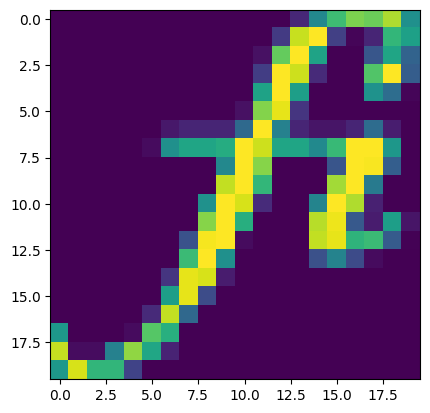

In [4]:
import matplotlib.pyplot as plt
plt.imshow(Xs[1], interpolation='nearest')
plt.show()

In [5]:
# create dictionaries for labels

display(Ys.size)

952

In [6]:
def getDictionaries(df):
    asciiToIndex = {}
    indexToAscii = {}

    s = df["m_label"]

    j = 0
    for i in range(0, max(s.values) + 1):
        if i in s.values:
            asciiToIndex[i] = j
            indexToAscii[j] = i
            j+=1


    return(asciiToIndex, indexToAscii)

asciiToIndex, indexToAscii = getDictionaries(df)
display(asciiToIndex)
display(indexToAscii)

for i in range( len(Ys)):
    Ys[i] = asciiToIndex[Ys[i]]
Xs = np.reshape(Xs, (-1, 1, 20, 20))
X_train, X_test, y_train, y_test = train_test_split(Xs,Ys, random_state=104, test_size=0.25, shuffle=True)

{33: 0,
 34: 1,
 35: 2,
 36: 3,
 37: 4,
 38: 5,
 39: 6,
 40: 7,
 41: 8,
 42: 9,
 43: 10,
 44: 11,
 45: 12,
 46: 13,
 47: 14,
 48: 15,
 49: 16,
 50: 17,
 51: 18,
 52: 19,
 53: 20,
 54: 21,
 55: 22,
 56: 23,
 57: 24,
 58: 25,
 59: 26,
 60: 27,
 61: 28,
 62: 29,
 63: 30,
 64: 31,
 65: 32,
 66: 33,
 67: 34,
 68: 35,
 69: 36,
 70: 37,
 71: 38,
 72: 39,
 73: 40,
 74: 41,
 75: 42,
 76: 43,
 77: 44,
 78: 45,
 79: 46,
 80: 47,
 81: 48,
 82: 49,
 83: 50,
 84: 51,
 85: 52,
 86: 53,
 87: 54,
 88: 55,
 89: 56,
 90: 57,
 91: 58,
 92: 59,
 93: 60,
 94: 61,
 95: 62,
 96: 63,
 97: 64,
 98: 65,
 99: 66,
 100: 67,
 101: 68,
 102: 69,
 103: 70,
 104: 71,
 105: 72,
 106: 73,
 107: 74,
 108: 75,
 109: 76,
 110: 77,
 111: 78,
 112: 79,
 113: 80,
 114: 81,
 115: 82,
 116: 83,
 117: 84,
 118: 85,
 119: 86,
 120: 87,
 121: 88,
 122: 89,
 123: 90,
 124: 91,
 125: 92,
 126: 93,
 161: 94,
 162: 95,
 163: 96,
 164: 97,
 165: 98,
 166: 99,
 167: 100,
 168: 101,
 169: 102,
 170: 103,
 171: 104,
 172: 105,
 173: 106,


{0: 33,
 1: 34,
 2: 35,
 3: 36,
 4: 37,
 5: 38,
 6: 39,
 7: 40,
 8: 41,
 9: 42,
 10: 43,
 11: 44,
 12: 45,
 13: 46,
 14: 47,
 15: 48,
 16: 49,
 17: 50,
 18: 51,
 19: 52,
 20: 53,
 21: 54,
 22: 55,
 23: 56,
 24: 57,
 25: 58,
 26: 59,
 27: 60,
 28: 61,
 29: 62,
 30: 63,
 31: 64,
 32: 65,
 33: 66,
 34: 67,
 35: 68,
 36: 69,
 37: 70,
 38: 71,
 39: 72,
 40: 73,
 41: 74,
 42: 75,
 43: 76,
 44: 77,
 45: 78,
 46: 79,
 47: 80,
 48: 81,
 49: 82,
 50: 83,
 51: 84,
 52: 85,
 53: 86,
 54: 87,
 55: 88,
 56: 89,
 57: 90,
 58: 91,
 59: 92,
 60: 93,
 61: 94,
 62: 95,
 63: 96,
 64: 97,
 65: 98,
 66: 99,
 67: 100,
 68: 101,
 69: 102,
 70: 103,
 71: 104,
 72: 105,
 73: 106,
 74: 107,
 75: 108,
 76: 109,
 77: 110,
 78: 111,
 79: 112,
 80: 113,
 81: 114,
 82: 115,
 83: 116,
 84: 117,
 85: 118,
 86: 119,
 87: 120,
 88: 121,
 89: 122,
 90: 123,
 91: 124,
 92: 125,
 93: 126,
 94: 161,
 95: 162,
 96: 163,
 97: 164,
 98: 165,
 99: 166,
 100: 167,
 101: 168,
 102: 169,
 103: 170,
 104: 171,
 105: 172,
 106: 173,


# Part 2

In [7]:
class Net(nn.Module):
    def __init__(self, outputs):
        super(Net, self).__init__()
        c1out = 6
        c2out = 16

        self.conv1 = nn.Conv2d(1, c1out, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.norm1 = nn.BatchNorm2d(c1out)

        self.conv2 = nn.Conv2d(c1out, c2out, 3)
        self.norm2 = nn.BatchNorm2d(c2out)

        self.pooledOutputSize = c2out * 3 * 3 
        self.fc1 = nn.Linear( self.pooledOutputSize, 120 )
        self.fc2 = nn.Linear( 120, outputs )

    def forward(self, x):

        x = self.norm1(self.pool(F.relu(self.conv1(x))))

        x = self.norm2(self.pool(F.relu(self.conv2(x))))

        x = x.view(-1, self.num_flat_features(x)) 
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x
    
    #compute the output size after our convolution layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [8]:
print(Xs.shape)

(952, 1, 20, 20)


In [9]:
def train( model, epochs, Xs, Ys ): # One epoch uses the entire training set (one batch at a time) - 60,000 images in this case
    
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.Adam( model.parameters(), lr= 1e-4 ) 
    
    tensor_x = torch.Tensor(Xs)
    tensor_y = torch.Tensor(Ys).long()
    dataset = TensorDataset(tensor_x, tensor_y)

    trainloader = DataLoader( dataset, batch_size=8, shuffle=True, num_workers=0 )

    for epoch in range( epochs ): # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate( trainloader, 0 ):
            # get the inputs; data is a list of [inputs, labels]

            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs) #predict the output with some training data
            loss = criterion(outputs, labels) #see how well we did

            loss.backward() #see how to change the weights to do better
            optimizer.step() #and actually change the weights

            # print statistics
            running_loss += loss.item()
            if i % 100 == 99:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

    print('Finished Training')

In [10]:
net = Net(len(asciiToIndex))
train(net, 100, X_train, y_train)

Finished Training


# Part 3

In [11]:
def evaluate( model, Xs, Ys ):  
    #load some test data

    tensor_x = torch.Tensor(Xs)
    tensor_y = torch.Tensor(Ys).long()
    dataset = TensorDataset(tensor_x, tensor_y)
    
    testloader = torch.utils.data.DataLoader( dataset, batch_size=8,
                                              shuffle=True, num_workers=0 )
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )

In [12]:
evaluate(net, X_test, y_test)

Accuracy of the network on the 10000 test images: 57 %


the old network had about 50 % accuracy, the new changed network has about 57% accuracy

In [13]:
df2 = pd.read_csv("fonts/BODONI.csv")
Xs2, Ys2 = getArrays(df2)

100%|██████████| 3964/3964 [00:04<00:00, 908.51it/s]


In [14]:
AsciiToIndex2, IndexToAscii2 = getDictionaries(df2)
for i in range( len(Ys2)):
    Ys2[i] = AsciiToIndex2[Ys2[i]]
Xs2 = np.reshape(Xs2, (-1, 1, 20, 20))

In [15]:
evaluate(net, Xs2, Ys2)

Accuracy of the network on the 10000 test images: 5 %


performance on a different font is terrible, only 6% vs 62%

In [16]:
combinedDF = pd.concat([df, df2])

In [17]:
combinedXs, combinedYs = getArrays(combinedDF)
combinedAsciiToIndex, combinedIndexToAscii = getDictionaries(combinedDF)

for i in range( len(combinedYs)):
    combinedYs[i] = combinedAsciiToIndex[combinedYs[i]]

combinedXs = np.reshape(combinedXs, (-1, 1, 20, 20))

combinedX_train, combinedX_test, combinedy_train, combinedy_test = train_test_split(combinedXs,combinedYs, random_state=104, test_size=0.25, shuffle=True)

100%|██████████| 4916/4916 [00:05<00:00, 918.01it/s]


In [18]:
combinedNet = Net(len(combinedAsciiToIndex))
train(combinedNet, 100, combinedX_train, combinedy_train)

[1,   100] loss: 5.559
[1,   200] loss: 5.502
[1,   300] loss: 5.441
[1,   400] loss: 5.376
[2,   100] loss: 5.200
[2,   200] loss: 5.143
[2,   300] loss: 5.066
[2,   400] loss: 4.961
[3,   100] loss: 4.763
[3,   200] loss: 4.641
[3,   300] loss: 4.564
[3,   400] loss: 4.412
[4,   100] loss: 4.105
[4,   200] loss: 4.074
[4,   300] loss: 3.983
[4,   400] loss: 3.895
[5,   100] loss: 3.566
[5,   200] loss: 3.515
[5,   300] loss: 3.433
[5,   400] loss: 3.312
[6,   100] loss: 3.072
[6,   200] loss: 3.037
[6,   300] loss: 2.905
[6,   400] loss: 2.881
[7,   100] loss: 2.668
[7,   200] loss: 2.644
[7,   300] loss: 2.476
[7,   400] loss: 2.561
[8,   100] loss: 2.327
[8,   200] loss: 2.334
[8,   300] loss: 2.298
[8,   400] loss: 2.232
[9,   100] loss: 2.108
[9,   200] loss: 2.052
[9,   300] loss: 2.101
[9,   400] loss: 1.924
[10,   100] loss: 1.896
[10,   200] loss: 1.863
[10,   300] loss: 1.842
[10,   400] loss: 1.848
[11,   100] loss: 1.755
[11,   200] loss: 1.737
[11,   300] loss: 1.610
[11,

In [19]:
evaluate(combinedNet, combinedX_test, combinedy_test)

Accuracy of the network on the 10000 test images: 63 %


accuracy of the 2 models stayed largely the same as just training it on one font when testing on the fonts that it was trained on

In [20]:
df3 = pd.read_csv("fonts/BRADLEY.csv")
Xs3, Ys3 = getArrays(df3)
AsciiToIndex3, IndexToAscii3 = getDictionaries(df3)
for i in range( len(Ys3)):
    Ys3[i] = AsciiToIndex3[Ys3[i]]
Xs3 = np.reshape(Xs3, (-1, 1, 20, 20))

evaluate(combinedNet, Xs3, Ys3)

100%|██████████| 980/980 [00:01<00:00, 903.57it/s]


Accuracy of the network on the 10000 test images: 15 %


/var/folders/1t/6_0gmj990xd1k93g4cc4msg40000gn/T/ipykernel_45946/3090473946.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  outputs = combinedNet.forward(torch.Tensor([Xs3[i]]))


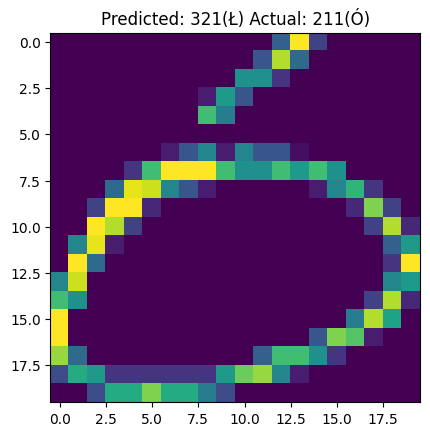

58.13542604446411 % sure that we are right


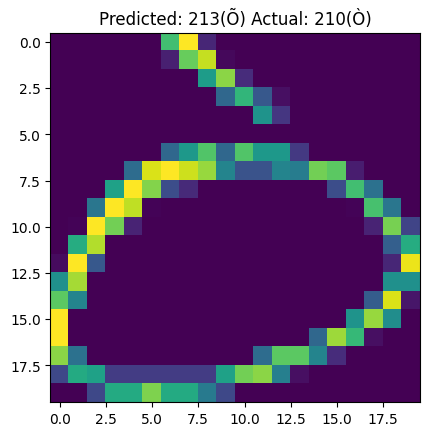

68.87202858924866 % sure that we are right


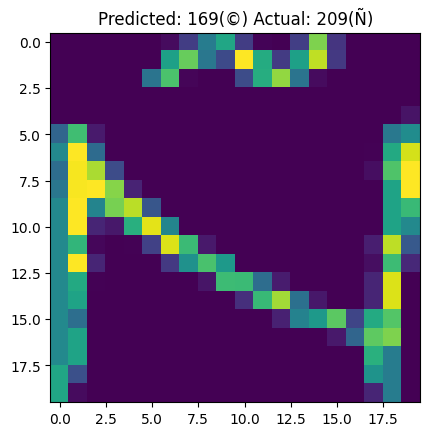

97.8075921535492 % sure that we are right


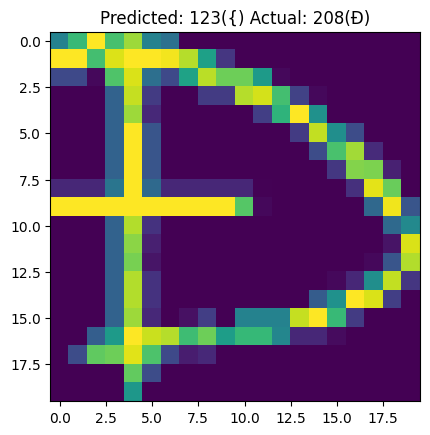

93.45287680625916 % sure that we are right


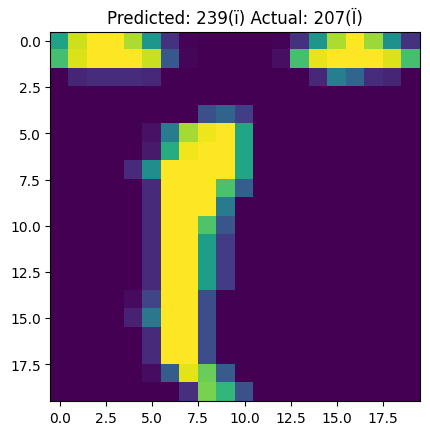

95.77797651290894 % sure that we are right


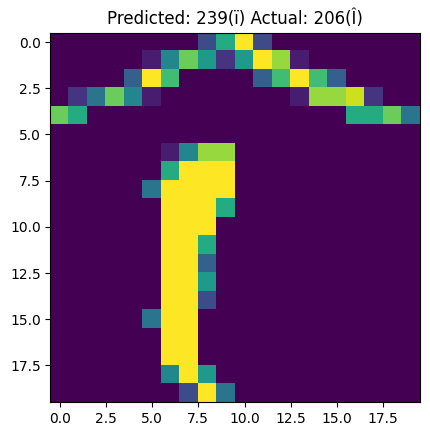

85.4849100112915 % sure that we are right


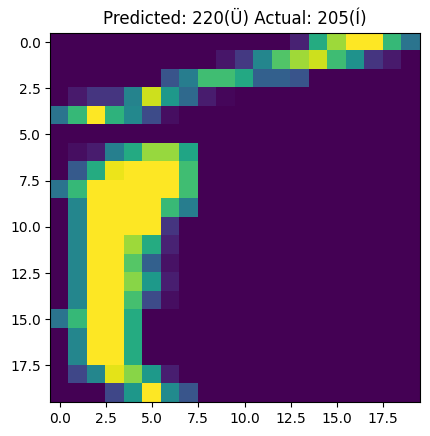

80.35727143287659 % sure that we are right


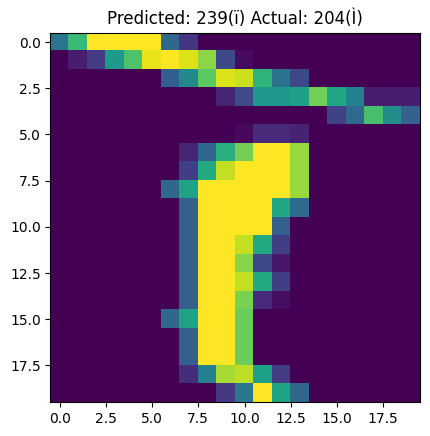

85.68394184112549 % sure that we are right


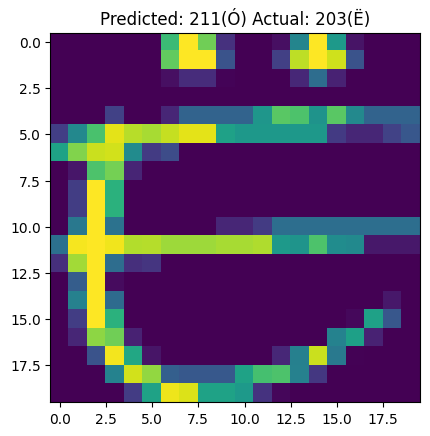

40.62869846820831 % sure that we are right


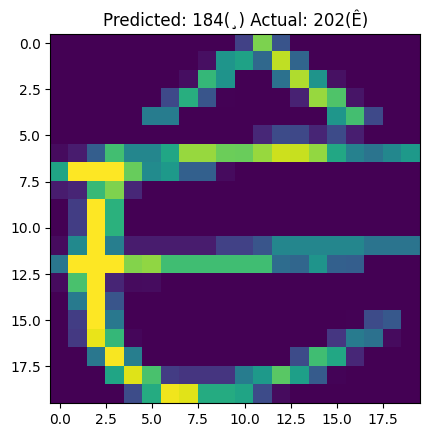

49.940651655197144 % sure that we are right


In [21]:
for i in range(100, 110):
    outputs = combinedNet.forward(torch.Tensor([Xs3[i]])) 
    _, predicted = torch.max(outputs.data, 1)
    plt.imshow(np.reshape(Xs3[i], (20, 20)))
    plt.title("Predicted: " + str(combinedIndexToAscii[predicted.item()]) + "(" + chr(combinedIndexToAscii[predicted.item()]) + ")" + " Actual: " + str(IndexToAscii3[Ys3[i]])+ "(" + chr(IndexToAscii3[Ys3[i]]) + ")")
    plt.show()
    print(str(torch.max(torch.softmax(outputs.squeeze(), dim=0)).item() * 100) + " % sure that we are right")


* thinner or italic characters seem to be more likely to be misclassified. But most misclassified characters look quite similar to the mistaken character, or simply have a difference of accents or dots
* most of the misclassified characters have very low certainty of being correct, while the correctly classified characters have very high (97% - 100%) certainty of being correct
* any character that wasn't incorperated in the trained fonts will automatically fail becuase there is no classification that matches.

# Part 4

In [22]:
# get font data with added noise levels
import random

notNoisyXs = Xs3
noisyXs = Xs3

for i in range(len(Xs3)):
    for j in range(20):
        for k in range(20):
            noisyXs[i, 0, j, k] = Xs3[i, 0, j, k] + random.gauss(0, .05)

noisy_train, noisy_test, notNoisy_train, notNoisy_test = train_test_split(noisyXs,notNoisyXs, random_state=104, test_size=0.25, shuffle=True)

In [23]:
# Crate the convolutional autoencoder
class CnnNet(nn.Module):
    def __init__(self):
        super(CnnNet, self).__init__()

        self.encodedSize = 64

        self.c1out = 6
        self.c2out = 6

        self.cv1 = nn.Conv2d(1, self.c1out, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.cv2 = nn.Conv2d(self.c1out, self.c2out, 3, padding=1)

        self.downscaledSize = 20//4 
        self.flattenedSize = self.downscaledSize*self.downscaledSize*self.c2out
        
        self.fc1 = nn.Linear(self.flattenedSize, 64)
        self.fc2 = nn.Linear(64, self.encodedSize)

        self.fc3 = nn.Linear(self.encodedSize, 64) #scale down to 64 features
        self.fc4 = nn.Linear(64, self.flattenedSize)
        
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear')
        self.cv3 = nn.Conv2d(self.c2out, self.c1out, 3, padding=1)
        
        self.cv4 = nn.Conv2d(self.c1out, 1, 3, padding=1)
    def compress(self, x):

        # convolutional block 1
        x = F.relu(self.pool(self.cv1(x)))
        # convolutional block 2
        x = F.relu(self.pool(self.cv2(x)))

        # flatten layer
        x = x.view(-1, self.flattenedSize)
        #dense leayer
        x = F.relu(self.fc2(F.relu(self.fc1(x))))

        return x
    
    def decompress(self, x):

        # dense layers
        x = F.relu(self.fc4(F.relu(self.fc3(x))))

        # unflatten layer
        x = x.view(-1, self.c2out, self.downscaledSize, self.downscaledSize)

        # convolutional blocks
        x = self.cv4(self.upsample(F.relu(self.cv3(self.upsample(x)))))
        return x
    
    def forward(self, x):
        x = self.compress(x)
        x = self.decompress(x)
       
        return x


In [24]:
criterion = nn.MSELoss()

def trainCNN(model, epochs, Xs, Ys):
    # create an optimizer object
    # Adam optimizer with learning rate 1e-3
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    tensor_x = torch.Tensor(Xs)
    tensor_y = torch.Tensor(Ys)
    dataset = TensorDataset(tensor_x, tensor_y)
    
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
    
    for epoch in range(epochs):
        loss = 0
        
        running_loss = 0
        
        for i, data in enumerate(train_loader, 0):

            #same as yesterday, except we're not even looking at the labels!
            # since we're not using a CNN, we need to "flatten" the input images
            batch_features = data[0]
        
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
        
            # compute reconstructions
            outputs = model(batch_features)
            #print(batch_features.shape)
            #print(outputs.shape)
            # compute training reconstruction loss
            # again, same idea as yesterday, but we're measuring the error slightly differently
            # how well does the reconstructed image match the input image?
            train_loss = criterion(outputs, batch_features)
        
            # compute accumulated gradients
            train_loss.backward()
        
            # perform parameter update based on current gradients
            optimizer.step()
        
            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
    
            # print statistics
            running_loss += train_loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.8f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    
        # compute the epoch training loss
        loss = loss / len(train_loader)
    
        # display the epoch training loss
        print("epoch : {}/{}, loss = {:.8f}".format(epoch + 1, epochs, loss))

def evaluateCNN(model, Xs, Ys):
    tensor_x = torch.Tensor(Xs)
    tensor_y = torch.Tensor(Ys)
    dataset = TensorDataset(tensor_x, tensor_y)

    test_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
    total_loss = 0
    with torch.no_grad():
        for data in test_loader:
            images = data[0]
            outputs = model(images)
            test_loss = criterion(outputs, images)
            total_loss += test_loss.item()

    print("overall loss: ", total_loss)

In [25]:
encoder = CnnNet()
trainCNN(encoder, 200, noisy_train, notNoisy_train)

epoch : 1/200, loss = 0.18141138
epoch : 2/200, loss = 0.13414318
epoch : 3/200, loss = 0.12801665
epoch : 4/200, loss = 0.12126402
epoch : 5/200, loss = 0.11431131
epoch : 6/200, loss = 0.10985108
epoch : 7/200, loss = 0.10441461
epoch : 8/200, loss = 0.09991424
epoch : 9/200, loss = 0.09633546
epoch : 10/200, loss = 0.09294312
epoch : 11/200, loss = 0.09037455
epoch : 12/200, loss = 0.08771282
epoch : 13/200, loss = 0.08534404
epoch : 14/200, loss = 0.08376275
epoch : 15/200, loss = 0.08201864
epoch : 16/200, loss = 0.07910651
epoch : 17/200, loss = 0.07766903
epoch : 18/200, loss = 0.07683891
epoch : 19/200, loss = 0.07576728
epoch : 20/200, loss = 0.07483423
epoch : 21/200, loss = 0.07366109
epoch : 22/200, loss = 0.07273395
epoch : 23/200, loss = 0.07232758
epoch : 24/200, loss = 0.07080231
epoch : 25/200, loss = 0.07034092
epoch : 26/200, loss = 0.06907668
epoch : 27/200, loss = 0.06830546
epoch : 28/200, loss = 0.06741310
epoch : 29/200, loss = 0.06732297
epoch : 30/200, loss = 

In [26]:
evaluateCNN(encoder, noisy_test, notNoisy_test)

overall loss:  1.525310155004263


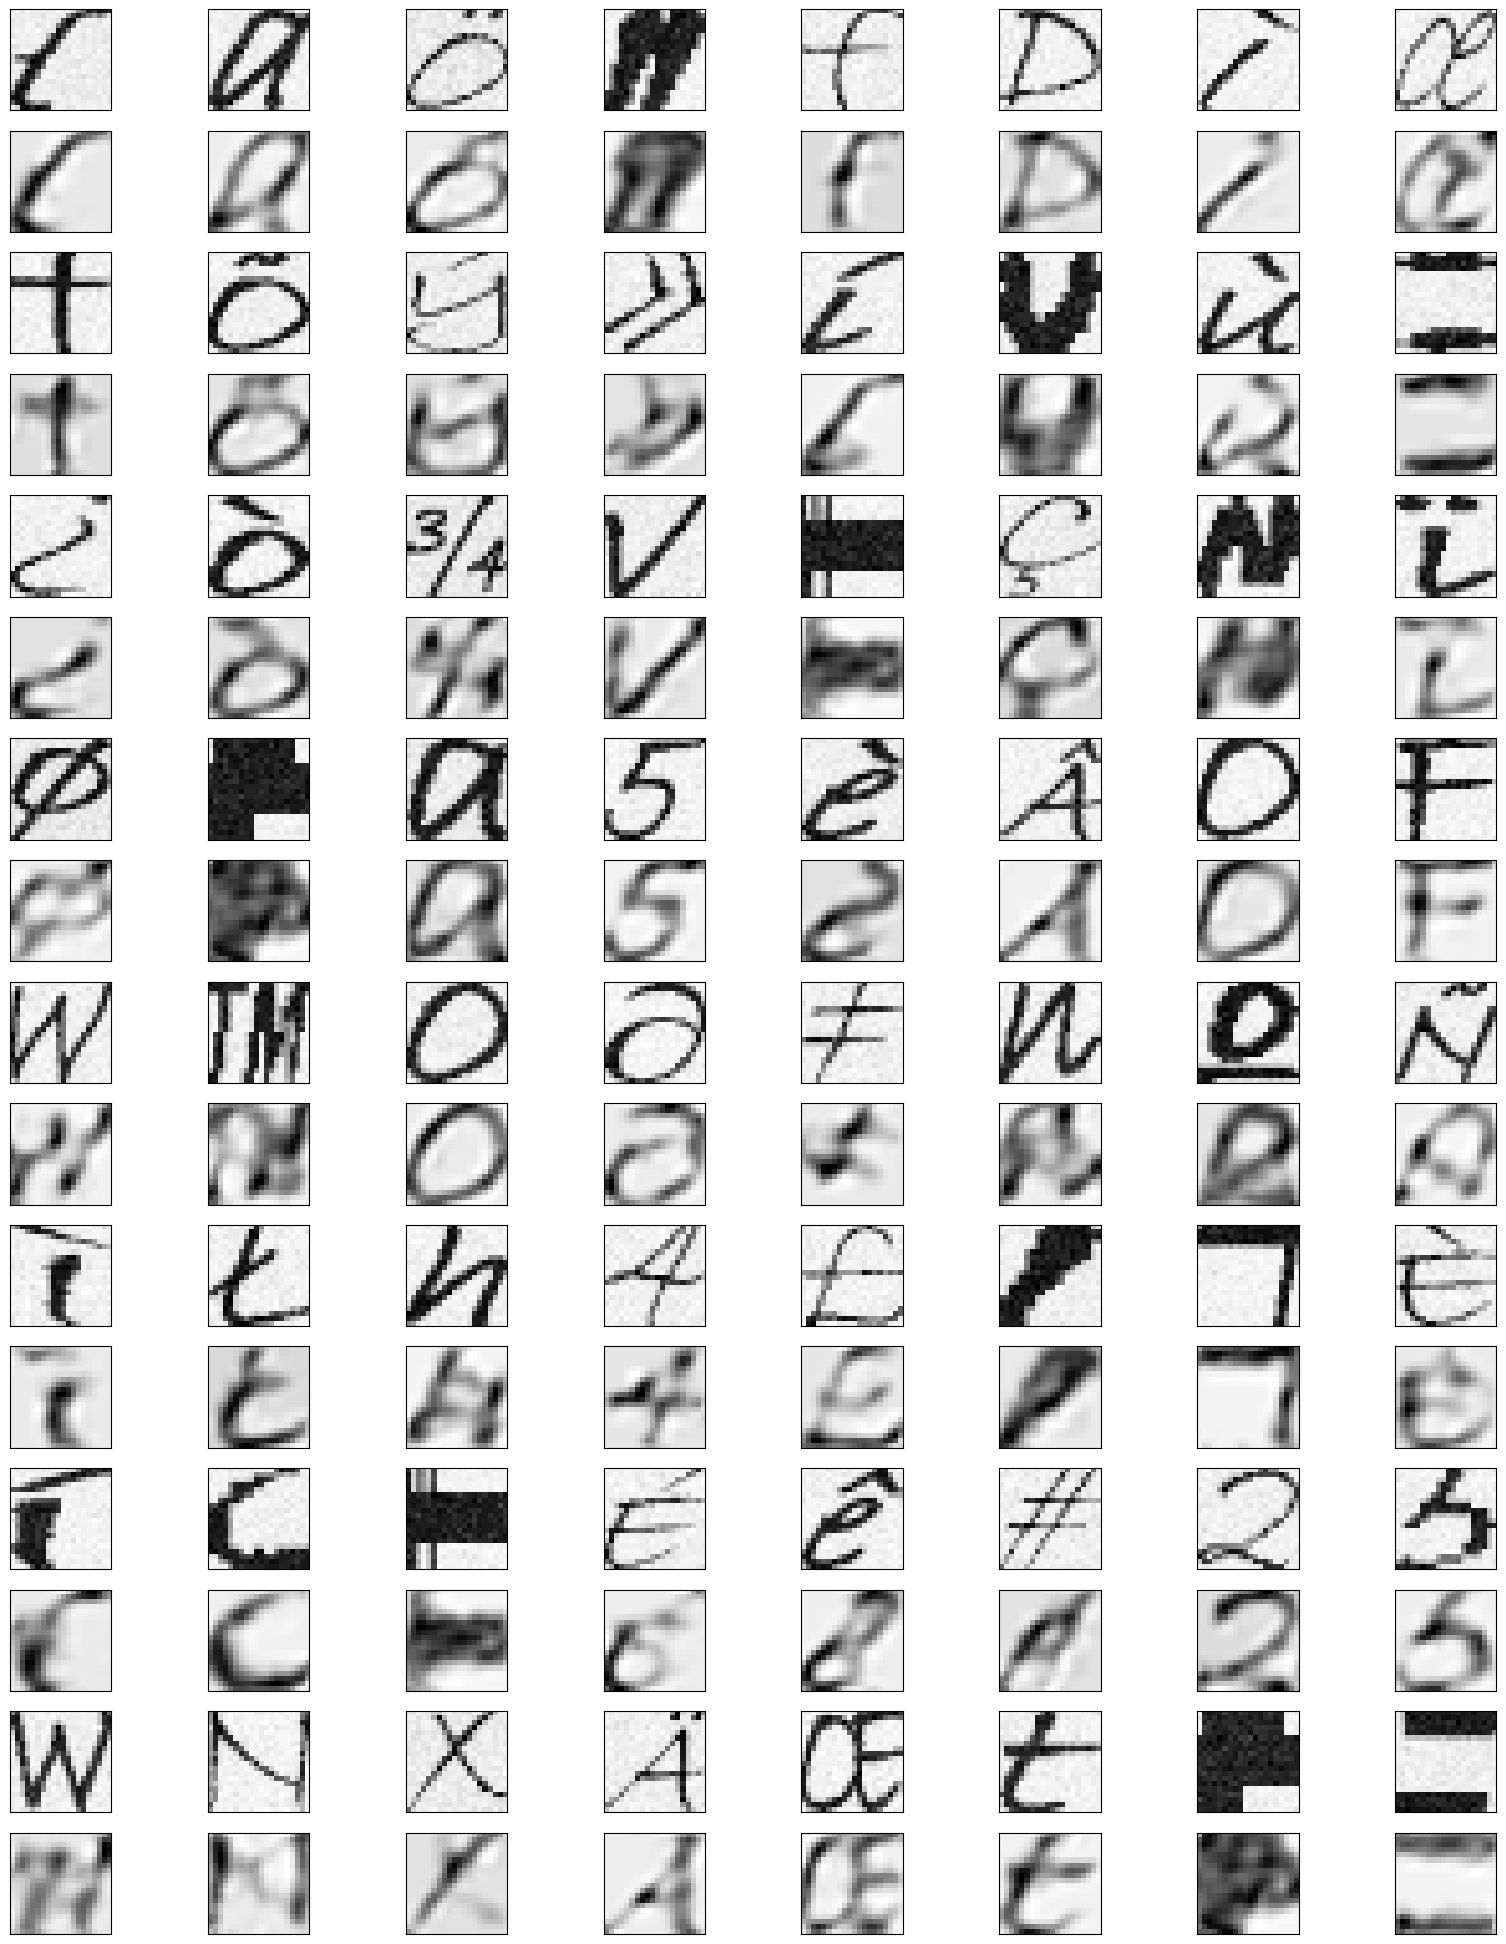

In [27]:
def drawComparisonsCNN(model, Xs, Ys):
    
    tensor_x = torch.Tensor(Xs)
    tensor_y = torch.Tensor(Ys)
    dataset = TensorDataset(tensor_x, tensor_y)

    test_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
    plt.figure(figsize=(20, 25))
    for i, batch in enumerate(test_loader):
        if i >= 8: break
        images = batch[0]
        #print(images.shape)
        with torch.no_grad():
            reconstructed = model(images)
            for j in range(len(images)):
                #draw the original image
                ax = plt.subplot(16, 8, i*16 + j + 1)
                plt.imshow(images[j].reshape((20,20)), cmap="Greys", interpolation=None)
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
            
                #and the reconstructed version in the next row
                ax = plt.subplot(16, 8, i*16 + j + 1 + 8)
                plt.imshow(reconstructed[j].reshape((20,20)), cmap="Greys", interpolation=None)
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
        
drawComparisonsCNN(encoder, noisy_test, notNoisy_test)

the convolutional encoder did remove the noise from the images, though with the current level of training, some of the images are a bit blurred or missing details.
It would be best to find a better encoder